30.03.2024, Maciej S.

# Linear Regression - Linear Least Squares (LLS)

We are seeking for $$min{\sum_{i=1}^n(y_i - \hat{y}_i)^2}.$$ It can be written as: $$min{\sum_{i=1}^n(y_i-ax_i-b)^2}.$$
After some algebraic transformations we get final, simple formula to calulate $a$ and $b$ in $y = ax+b$ function (linear regression): $$a = \frac{\sum_{i=1}^n(x_i-\overline{x})(y_i-\overline{y})}{\sum_{i=1}^n(x_i- \overline{x})^2},$$ $$b = \overline{y} -a\overline{x}.$$

In [16]:
import numpy as np

def calculate_slope(X, y):
    """
    Calculate slope in y = ax + b equation of linear regression,
    X and y needs to have same size
    """
    #calculate means
    X_mean = np.mean(X)
    y_mean = np.mean(y)

    #calculate sums
    numerator = 0
    for n in range(len(X)):
        numerator += (X[n] - X_mean) * (y[n] - y_mean)
    
    denominator = np.sum([np.square(X[i] - X_mean) for i in range(len(X))])

    return numerator / denominator
    
def calculate_b(X, y):
    """
    Calculate b coefficient in linear regress. func. (y = ax + b)
    """
    #calculate means
    X_mean = np.mean(X)
    y_mean = np.mean(y)

    #get slope
    a = calculate_slope(X, y)

    return y_mean - a * X_mean

def linear_func(X, y, input_):
    """
    Return estimated (by linear regression) value in provided point
    """
    a = calculate_slope(X, y)
    b = calculate_b(X, y)
    return a * input_ + b

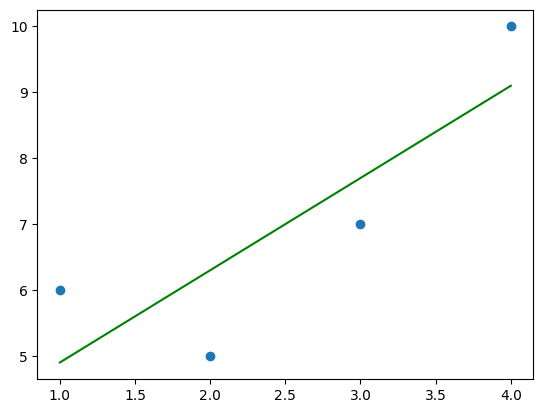

In [17]:
from matplotlib import pyplot as plt

#samples
X = [1, 2, 3, 4]
y = [6, 5, 7, 10]

plt.scatter(X, y)

#values estimated using least squares
y_est = [linear_func(X, y, var) for var in X]

plt.plot(X, y_est, 'g')
plt.show()

In [26]:
import pandas

#read dataset into pandas DataFrame
df = pandas.read_csv('samples.csv')

#assign attributes
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df.columns = attributes

#print first rows
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           4.9          3.0           1.4          0.2  Iris-setosa
1           4.7          3.2           1.3          0.2  Iris-setosa
2           4.6          3.1           1.5          0.2  Iris-setosa
3           5.0          3.6           1.4          0.2  Iris-setosa
4           5.4          3.9           1.7          0.4  Iris-setosa


In [28]:
#print values from X column
print(df['sepal_length'].values)

[4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1 5.7
 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.  5.5
 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5 6.5
 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1 6.3
 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5 5.5
 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3 6.7
 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2 6.2
 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8 6.7
 6.7 6.3 6.5 6.2 5.9]


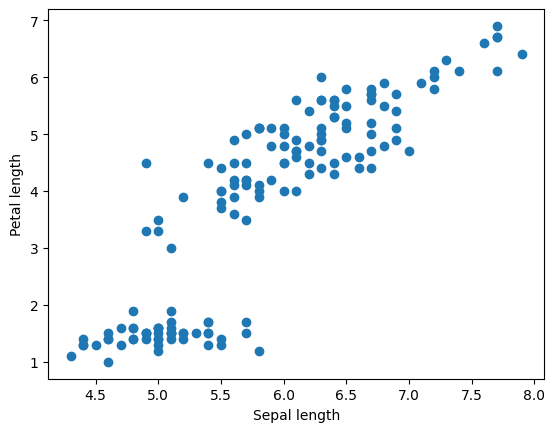

In [39]:
#save data and labels in separate arrays
X = df['sepal_length'].values
y = df['petal_length'].values

#plot imported data
plt.scatter(X, y)
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.show()

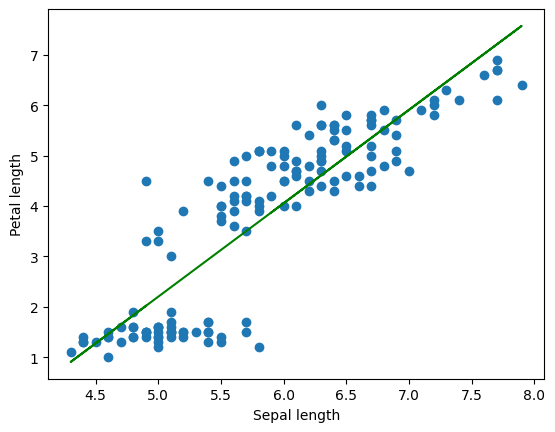

In [40]:
#approximation of correlation between petal and sepal length using Linear Least Square

y_estimated = [linear_func(X, y, sample) for sample in X]

plt.scatter(X, y)
plt.plot(X, y_estimated, 'g')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.show()

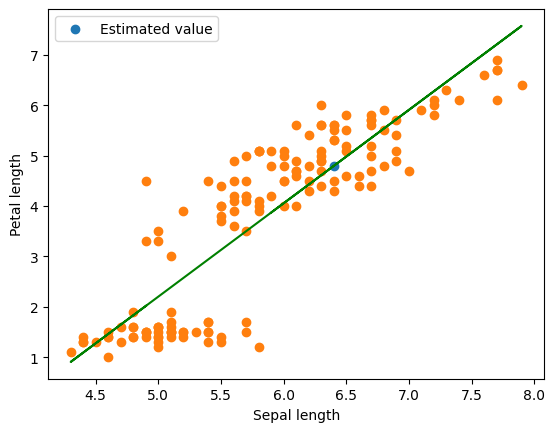

In [61]:
#estimate a value in new point

new_val = 6.4

plt.scatter(new_val, linear_func(X, y, new_val), label='Estimated value')

plt.scatter(X, y)
plt.plot(X, y_estimated, 'g')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend()
plt.show()